In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from random import random

In [2]:
df = pd.read_csv('../../dataset-normalized.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,1,1102,0,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,False,2,279,1,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,True,1,1373,1,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,False,2,1392,1,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,False,1,591,1,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,False,2,884,1,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,False,1,613,1,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,False,1,155,1,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,False,2,1023,0,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [3]:
satisfaction_columns = []

for column in df:
    if 'satisfaction' in column.lower():
        satisfaction_columns.append(column)

print(satisfaction_columns)

# Dodanie kolumny będącą średnią arytmetyczną powyższych
df['OverallSatisfaction'] = (df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']) / 3

['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']


In [4]:
satisfaction_columns.append('OverallSatisfaction')
satisfaction_columns

['EnvironmentSatisfaction',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'OverallSatisfaction']

In [5]:
if_attr = dict(df['Attrition'].value_counts())
if_attr

{False: 1233, True: 237}

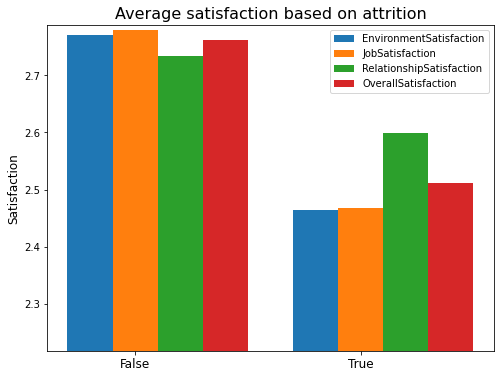

In [6]:
labels = if_attr.keys()

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

# Dla `plt.ylim`
results_min = float('inf')
results_max = 0

for idx, satisfaction_column in enumerate(satisfaction_columns):
    results = []
    
    for attr in if_attr:
        results.append(df.where(df['Attrition'] == attr).dropna()[satisfaction_column].mean())
        
    if results_min > min(results):
        results_min = min(results)
        
    if results_max < max(results):
        results_max = max(results)
    
    ax.bar(x + ((idx - 1) * width), results, width, label=satisfaction_column)

ax.set_ylabel('Satisfaction', size = 12)
ax.set_title('Average satisfaction based on attrition', size = 16)
ax.set_xticks(x)
ax.set_xticklabels(labels, size = 12)
ax.legend()

fig.set_size_inches(8, 6)

plt.ylim([results_min - (results_min * 0.1), results_max + 0.01])
plt.show()

In [7]:
df_corr = df.corr()
corr_asc = df_corr.sort_values('Attrition', ascending = True)
corr_desc = df_corr.sort_values('Attrition', ascending = False)
corr_asc = corr_asc.Attrition
corr_desc = corr_desc.Attrition

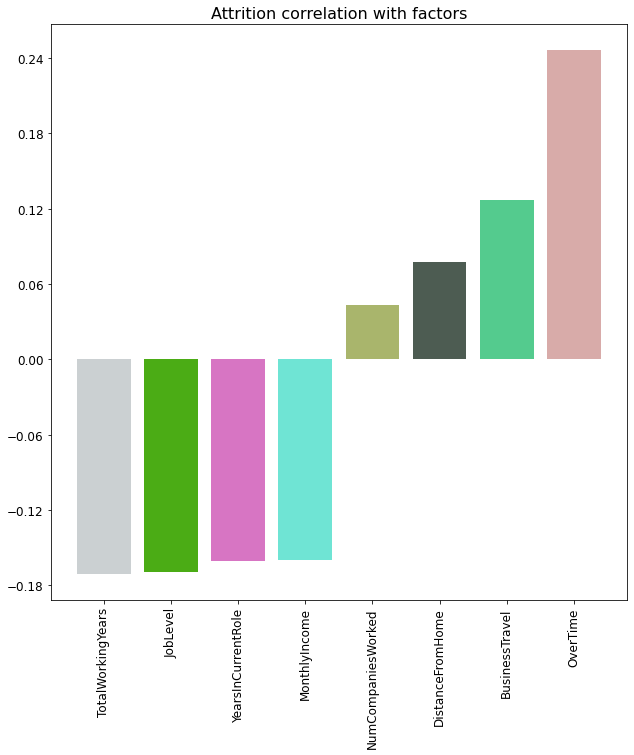

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

sample_size = 4
factors = list(dict(corr_asc[:sample_size]).keys()) + list(dict(corr_desc[1:sample_size+1]).keys())[::-1]
corr = list(dict(corr_asc[:sample_size]).values()) + list(dict(corr_desc[1:sample_size+1]).values())[::-1]

a = round(max(corr) + .1, 1)
b = round(min(corr) - .1, 1) 
y = np.arange(b, a, (a - b) / 10)
ax.set_yticks(y)

ax.set_title('Attrition correlation with factors', size = sample_size * 4)
colors = [ (random(), random(), random()) for i in range(sample_size * 2) ]

fig.set_size_inches(sample_size * 2, 8)
plt.xticks(rotation=90, size=sample_size * 3)
plt.yticks(size=sample_size * 3)

ax.bar(factors, corr, color=colors)
plt.show()